<a href="https://colab.research.google.com/github/MohammedAli201/Image-Processing-Convolution/blob/main/Image_processing_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Convolution neural network for image classification**

Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [ ]:
tf.__version__

'2.11.0'

Laoding Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/computer-vision-codes/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()


In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

In [ ]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer100.bmp')

Train and test

In [ ]:
training_generator = ImageDataGenerator(rescale = 1./255, rotation_range=7,horizontal_flip=True,zoom_range=0.2)

In [ ]:
train_dataset  = training_generator.flow_from_directory('/content/homer_bart_2/training_set', target_size=(64,64), batch_size=8, class_mode='categorical', shuffle=True)

Found 215 images belonging to 2 classes.


In [ ]:
train_dataset.classes

In [ ]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
from tensorflow.python.ops.batch_ops import batch
test_generator = ImageDataGenerator(rescale = 1./255)
test_dataset = test_generator.flow_from_directory('/content/homer_bart_2/test_set', target_size =(64,64), batch_size=1,class_mode='categorical', shuffle=False)


Found 54 images belonging to 2 classes.


In [ ]:
test_dataset.classes

In [ ]:
from warnings import filters
network = Sequential()
network.add((Conv2D(filters=32,kernel_size = (3,3), activation = 'relu', input_shape=(64,64,3))))
network.add((MaxPool2D(pool_size=(2,2))))

network.add((Conv2D(filters=32,kernel_size = (3,3), activation = 'relu')))
network.add((MaxPool2D(pool_size=(2,2))))

network.add((Conv2D(filters=32,kernel_size = (3,3), activation = 'relu')))
network.add((MaxPool2D(pool_size=(2,2))))

network.add((Flatten()))

network.add((Dense(units = 577, activation = 'relu')))
network.add((Dense(units = 577, activation = 'relu')))
network.add((Dense(units = 2, activation = 'softmax')))

network.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 32)        

In [ ]:
network.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = network.fit_generator(train_dataset, epochs=50)

<ipython-input-24-5df4b5f3c6a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = network.fit_generator(train_dataset, epochs=50)


Epoch 1/50
27/27 [==============================] - 3s 47ms/step - loss: 0.6635 - accuracy: 0.6326
Epoch 2/50
27/27 [==============================] - 2s 72ms/step - loss: 0.6150 - accuracy: 0.6744
Epoch 3/50
27/27 [==============================] - 1s 45ms/step - loss: 0.5112 - accuracy: 0.7581
Epoch 4/50
27/27 [==============================] - 1s 41ms/step - loss: 0.4809 - accuracy: 0.7628
Epoch 5/50
27/27 [==============================] - 1s 42ms/step - loss: 0.4053 - accuracy: 0.8000
Epoch 6/50
27/27 [==============================] - 1s 42ms/step - loss: 0.3747 - accuracy: 0.8140
Epoch 7/50
27/27 [==============================] - 1s 44ms/step - loss: 0.2983 - accuracy: 0.8791
Epoch 8/50
27/27 [==============================] - 1s 42ms/step - loss: 0.2643 - accuracy: 0.8977
Epoch 9/50
27/27 [==============================] - 1s 43ms/step - loss: 0.2468 - accuracy: 0.8791
Epoch 10/50
27/27 [==============================] - 2s 70ms/step - loss: 0.2086 - accuracy: 0.8930
Epoch 11/

In [ ]:
predictions  = network.predict(test_dataset)
predictions

54/54 [==============================] - 0s 4ms/step


array([[1.00000000e+00, 2.49781151e-11],
       [9.99994993e-01, 4.99608950e-06],
       [5.83001494e-01, 4.16998506e-01],
       [1.00000000e+00, 1.65920045e-12],
       [1.00000000e+00, 1.56703965e-15],
       [1.00000000e+00, 2.35933523e-14],
       [9.93979931e-01, 6.02013431e-03],
       [3.15966245e-05, 9.99968410e-01],
       [2.83793174e-03, 9.97162104e-01],
       [8.43169749e-01, 1.56830266e-01],
       [6.88212458e-04, 9.99311805e-01],
       [1.00000000e+00, 3.46549101e-09],
       [9.95969057e-01, 4.03096341e-03],
       [9.99999166e-01, 8.42061922e-07],
       [9.98406112e-01, 1.59390992e-03],
       [9.99997139e-01, 2.89984428e-06],
       [9.99795139e-01, 2.04897093e-04],
       [9.99002755e-01, 9.97237861e-04],
       [1.32361034e-04, 9.99867678e-01],
       [1.00000000e+00, 5.78199272e-13],
       [1.58022814e-11, 1.00000000e+00],
       [1.00000000e+00, 1.51491408e-09],
       [9.99984741e-01, 1.52744979e-05],
       [9.37120497e-01, 6.28794953e-02],
       [9.998617

In [ ]:
predictions = np.argmax(predictions, axis=1)
predictions


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
test_dataset.classes

In [ ]:
from sklearn.metrics import accuracy_score 

In [ ]:
accuracy_score(test_dataset.classes,predictions)

0.8888888888888888

<AxesSubplot:>

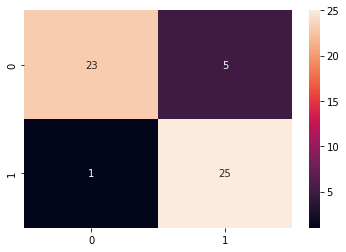

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.83      0.96      0.89        26

    accuracy                           0.89        54
   macro avg       0.90      0.89      0.89        54
weighted avg       0.90      0.89      0.89        54

